In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [16]:
hist = []

In [17]:
hist.append(np.load(r'C:\Users\kyoto\WaveDump\caribrated_data\01241002down.npy'))

In [18]:
hist.append(np.load(r'C:\Users\kyoto\WaveDump\caribrated_data\01241541down.npy'))

In [19]:
hist.append(np.load(r'C:\Users\kyoto\WaveDump\caribrated_data\01242103down.npy'))

In [20]:
hist.append(np.load(r'C:\Users\kyoto\WaveDump\caribrated_data\01251544down.npy'))

In [21]:
edges = np.load(r'C:\Users\kyoto\WaveDump\caribration\down\down_keV_edges.npy')

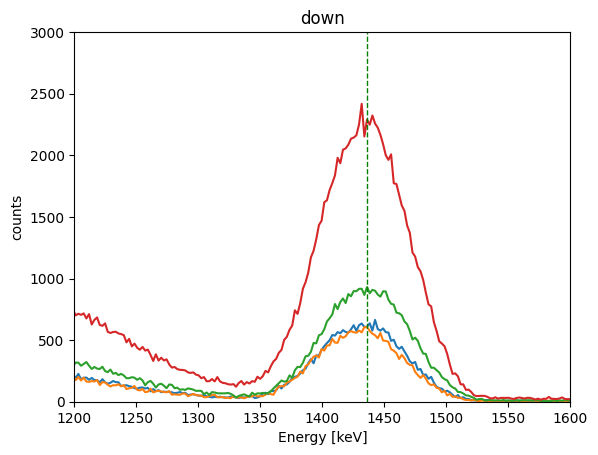

In [23]:
plt.plot(edges[:-1],hist[0])
plt.plot(edges[:-1],hist[1])
plt.plot(edges[:-1],hist[2])
plt.plot(edges[:-1],hist[3])
#plt.yscale('log')
plt.xlim([1200,1600])
plt.ylim([0,3000])
plt.title('down')
plt.xlabel('Energy [keV]')
plt.ylabel('counts')
plt.axvline(1436, color="green", linestyle="dashed", linewidth = 1)

Amplitude: 631.0705527675473 ± 4.701494416660926
Mean: 1432.7668744026348 ± 0.3055580050028285
Stddev: 35.455210519295264 ± 0.3256655771943139
Amplitude: 581.2096494971214 ± 3.9687744576216017
Mean: 1430.5949454217832 ± 0.2770781431199648
Stddev: 35.1526404743754 ± 0.2934544878335601
Amplitude: 929.4402156734046 ± 5.218847331107135
Mean: 1436.3410882566975 ± 0.23283324521186588
Stddev: 35.65112456489456 ± 0.2504601135796787
Amplitude: 2278.682951358619 ± 10.206698776330942
Mean: 1434.5050218487804 ± 0.18883184568432768
Stddev: 36.306356343198146 ± 0.2036627716717822


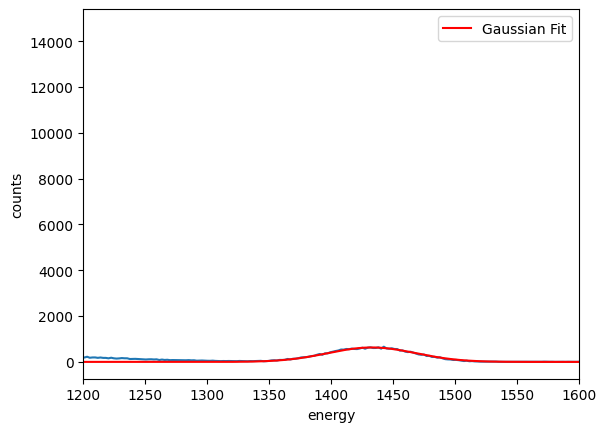

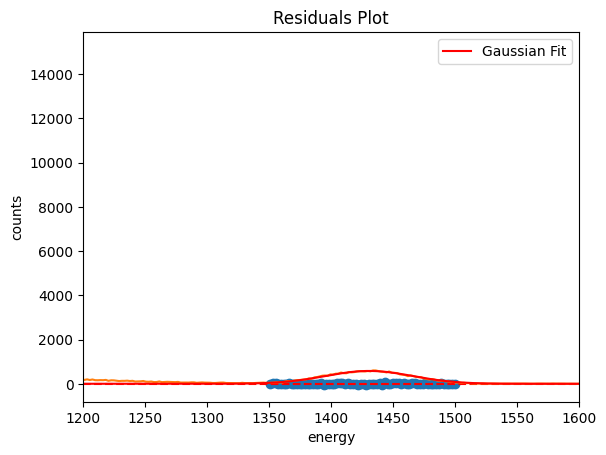

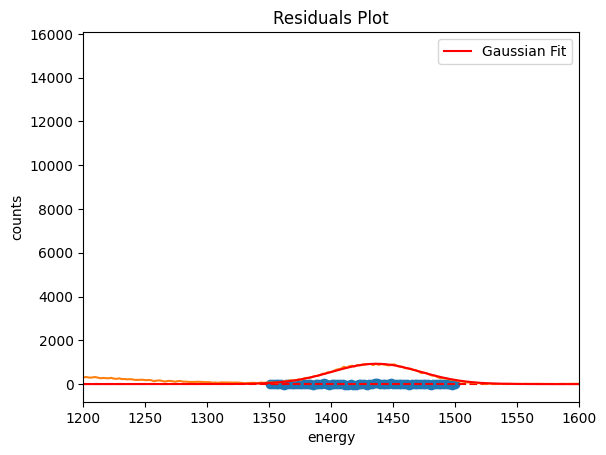

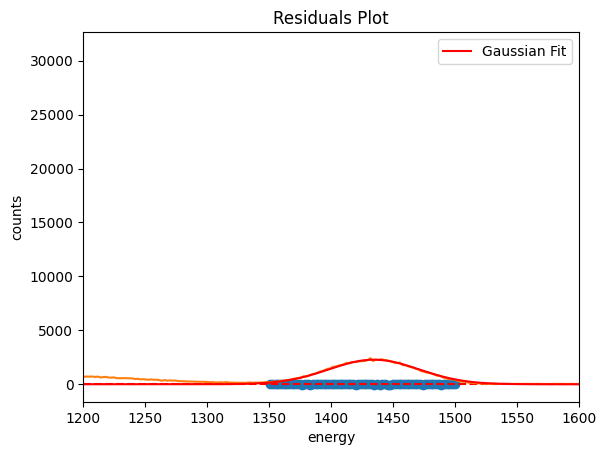

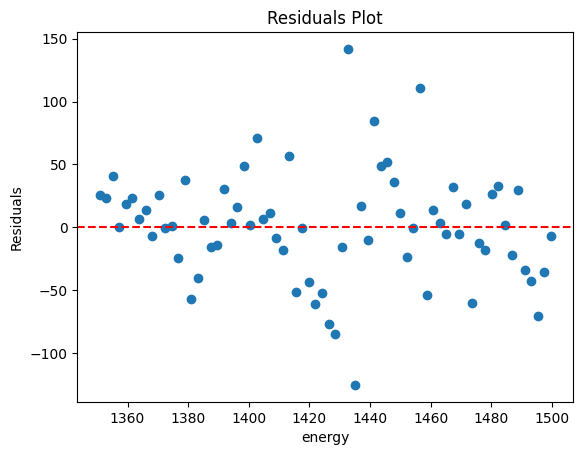

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.feature_selection import chi2

for loop in range(4):
    plt.plot(edges[:-1], hist[loop])
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    
    fit_range_mask = (bin_centers >= 1350) & (bin_centers <= 1500)
    fit_range_bin_centers = bin_centers[fit_range_mask]
    
    fit_range_hist_data = [hist[loop][i] for i in range(len(bin_centers)) if fit_range_mask[i]]
    
    def gaussian(x, amplitude, mean, stddev):
        return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)
    
    initial_params = [1000, 1450, 10]
    
    params, covariance = curve_fit(gaussian, fit_range_bin_centers, fit_range_hist_data, p0=initial_params)
    amplitude, mean, stddev = params
    
    plt.plot(bin_centers, gaussian(bin_centers, amplitude, mean, stddev), 'r-', label='Gaussian Fit')
    plt.xlim([1200, 1600])
    plt.xlabel('energy')
    plt.ylabel('counts')
    plt.legend()
    
    # 残差の確認
    residuals = fit_range_hist_data - gaussian(fit_range_bin_centers, amplitude, mean, stddev)
    plt.figure()
    plt.plot(fit_range_bin_centers, residuals, 'o')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('energy')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    
    # フィッティングのパラメータのエラーバー
    errors = np.sqrt(np.diag(covariance))
    print(f'Amplitude: {amplitude} ± {errors[0]}')
    print(f'Mean: {mean} ± {errors[1]}')
    print(f'Stddev: {stddev} ± {errors[2]}')
    
    # chi_squared, p_value = chi2(f_obs=fit_range_hist_data, f_exp=predicted_values)
    # print(f'Chi-squared: {chi_squared}')
    # print(f'P-value: {p_value}')

plt.show()


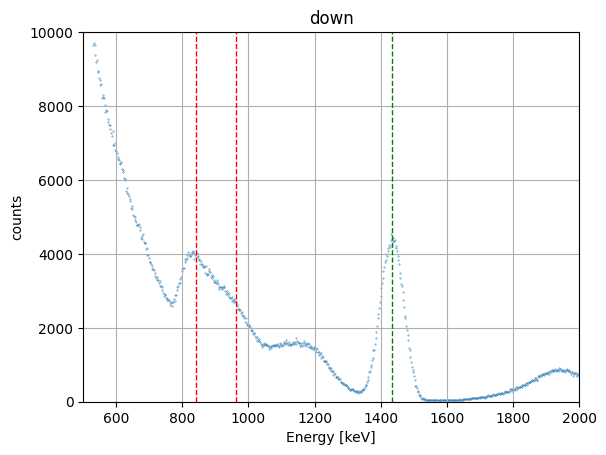

In [12]:
plt.scatter(edges, hist, s = 0.1)
#plt.yscale('log')
plt.xlim([500, 2000])
plt.ylim([0, 10000])
plt.xlabel('Energy [keV]')
plt.ylabel('counts')
plt.title('down')
plt.grid(True)
plt.axvline(841, color="red", linestyle="dashed", linewidth = 1)
plt.axvline(963, color="red", linestyle="dashed", linewidth = 1)
plt.axvline(1435, color="green", linestyle="dashed", linewidth = 1)
plt.savefig(r'C:\Users\kyoto\WaveDump\down.png')

In [27]:
np.save(r'C:\Users\kyoto\WaveDump\down.npy', hist)

In [30]:
#open background data
with open(r"C:\Users\kyoto\WaveDump\down01231551_BG\01231551down0.txt") as g:
    glines = g.readlines()
    gnum = len(glines)/1023
    print(gnum)

11241.0


(500.0, 570.0)

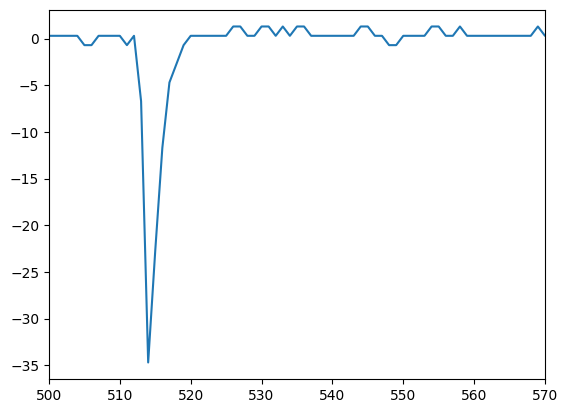

In [31]:
gtest = np.array([int(line) for line in glines[:1023]])
gtest.mean()
plt.plot(gtest - gtest[0:500].mean())
gsubtracted = gtest - gtest[0:500].mean()
gsubtracted[510:530].sum()
plt.xlim([500, 570])

In [32]:
N_points = 1023
gdata = np.array([int(line) for line in glines])
glength = len(gdata)//N_points
gdata_res = gdata[:glength * N_points].reshape(-1,N_points)

def intg(d):
    return (d[510:525] - d[:500].mean()).sum() 

garray = [-intg(d) for d in gdata_res]
ghist, gedges = np.histogram(garray, bins=1000, range=(0,1000))

Text(0, 0.5, 'ADC counts')

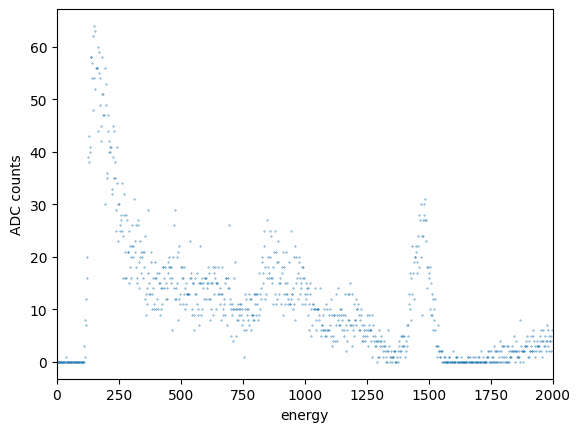

In [33]:
plt.scatter(edges, ghist, s = 0.1)
plt.xlim([0, 2000])
plt.xlabel('energy')
plt.ylabel('ADC counts')

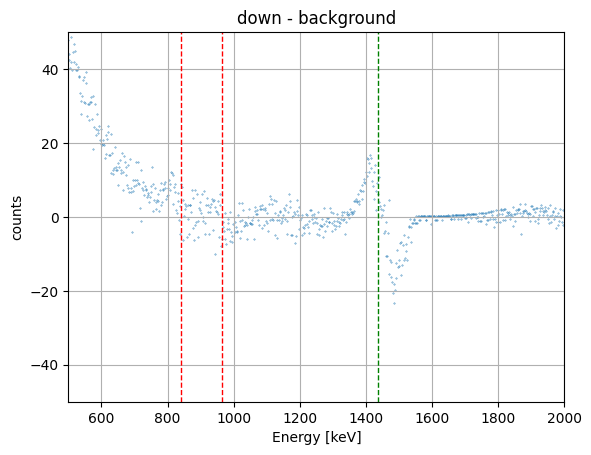

In [39]:
hist_diff = hist/190 - ghist
plt.scatter(edges, hist_diff, s=0.1)
plt.xlim([500, 2000])
plt.ylim([-50, 50])
plt.xlabel('Energy [keV]')
plt.ylabel('counts')
plt.title('down - background')
plt.grid(True)
plt.axvline(841, color="red", linestyle="dashed", linewidth = 1)
plt.axvline(963, color="red", linestyle="dashed", linewidth = 1)
plt.axvline(1435, color="green", linestyle="dashed", linewidth = 1)
plt.savefig(r'C:\Users\kyoto\WaveDump\downminusback.png')